<a href="https://colab.research.google.com/github/ishitananda3/Data-analysis-Data-science/blob/main/Sales_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas

**1. Data Cleaning & Validation**

In [ ]:
import pandas as pd
df=pd.read_csv("Assignment - Analytics Intern - Airlearn - sales_data_500.csv")

Ensure numeric fields are valid:

In [ ]:
# Convert columns to numeric, coercing errors to NaN
#  Convert columns to numeric using pd.to_numeric() and drop rows with invalid values using dropna().
df['Quantity Sold'] = pd.to_numeric(df['Quantity Sold'], errors='coerce')
df['Unit Price'] = pd.to_numeric(df['Unit Price'], errors='coerce')
df['Total Revenue'] = pd.to_numeric(df['Total Revenue'], errors='coerce')

# Drop rows with invalid numeric values
df = df.dropna(subset=['Quantity Sold', 'Unit Price', 'Total Revenue'])


Remove duplicate entries:

In [ ]:
df = df.drop_duplicates()

Apply data validation for "Product Category" and "Payment Method":

In [ ]:
# Define valid categories and payment methods
valid_categories = ['Electronics', 'Clothing', 'Books', 'Others']
valid_payment_methods = ['Credit Card', 'Cash', 'PayPal']

# Filter rows with invalid categories or payment methods
df = df[df['Product Category'].isin(valid_categories)]
df = df[df['Payment Method'].isin(valid_payment_methods)]

**2. Revenue Analysis**

Calculate total revenue for each product category:

In [ ]:
#  Use groupby() and sum() to calculate revenue for each category.
total_revenue_by_category = df.groupby('Product Category')['Total Revenue'].sum()
print(total_revenue_by_category)

Product Category
Books          83932.60
Clothing       68298.73
Electronics    76498.51
Name: Total Revenue, dtype: float64


**Identify the top 5 best-selling products:**

In [ ]:
# Use groupby(), sum(), and nlargest(5) to find the top 5 products by revenue
top_5_products = df.groupby('Product Name')['Total Revenue'].sum().nlargest(5)
print(top_5_products)

Product Name
Non-Fiction    25302.03
Laptop         23883.37
Comics         21654.89
Smartphone     21146.91
Jeans          20502.59
Name: Total Revenue, dtype: float64


**Determine the payment method generating the highest revenue:**

In [ ]:
# Use groupby(), sum(), and idxmax() to find the payment method with the highest revenue.
highest_revenue_payment_method = df.groupby('Payment Method')['Total Revenue'].sum().idxmax()
print(highest_revenue_payment_method)

PayPal


**3. Customer Insights**

Identify the top 3 customers who have spent the most:

In [ ]:
#  Use groupby(), sum(), and nlargest(3) to identify the top 3 customers by spending.
top_3_customers = df.groupby('Customer Name')['Total Revenue'].sum().nlargest(3)
print(top_3_customers)

Customer Name
George Brown     30819.16
Edward Kim       26565.17
Charlie Davis    25774.97
Name: Total Revenue, dtype: float64


Count the number of unique customers:

In [ ]:
# Use nunique() to count unique customers.
unique_customers = df['Customer Name'].nunique()
print(f"Number of unique customers: {unique_customers}")

Number of unique customers: 10


Count the number of unique customers:

In [ ]:
# Use groupby() and size() to find customers with multiple purchases on the same day.
df['Date'] = pd.to_datetime(df['Date'])
same_day_purchases = df.groupby(['Customer Name', 'Date']).size().reset_index(name='Purchase Count')
same_day_purchases = same_day_purchases[same_day_purchases['Purchase Count'] > 1]
print(same_day_purchases)

     Customer Name       Date  Purchase Count
10   Alice Johnson 2024-11-27               2
11   Alice Johnson 2024-11-28               2
68   Charlie Davis 2025-01-18               2
102     Edward Kim 2024-09-23               2
129     Edward Kim 2025-01-26               2
149    Fiona Green 2024-12-27               3
165   George Brown 2024-10-26               2
169   George Brown 2024-11-18               2
185   George Brown 2025-01-29               2
235      Ian Black 2024-11-26               2
240      Ian Black 2024-12-22               2
258    Julia Adams 2024-10-09               2
266    Julia Adams 2024-12-29               2
267    Julia Adams 2024-12-30               2
279    Julia Adams 2025-02-14               2


**4. Delivery Performance**

Calculate the percentage of orders by status:

In [ ]:
# Use value_counts(normalize=True) to calculate the percentage of orders by status.
order_status_percentage = df['Delivery Status'].value_counts(normalize=True) * 100
print(order_status_percentage)

Delivery Status
Delivered    75.503356
Pending      16.778523
Cancelled     7.718121
Name: proportion, dtype: float64


Highlight orders using conditional formatting:

In [ ]:
# Use style.apply() to highlight rows based on order status.
def highlight_status(row):
    if row['Delivery Status'] == 'Pending':
        return ['background-color: yellow'] * len(row)
    elif row['Delivery Status'] == 'Cancelled':
        return ['background-color: red'] * len(row)
    elif row['Delivery Status'] == 'Delivered':
        return ['background-color: green'] * len(row)
    else:
        return [''] * len(row)

df.style.apply(highlight_status, axis=1)

,Date,Order ID,Customer Name,Product Category,Product Name,Quantity Sold,Unit Price,Total Revenue,Payment Method,Delivery Status,Days Pending
0,2024-09-03 00:00:00,ORD10000,Julia Adams,Clothing,Jeans,5,493.440000,2467.200000,Cash,Delivered,176
1,2024-12-19 00:00:00,ORD10001,George Brown,Books,Non-Fiction,4,246.750000,987.000000,PayPal,Delivered,69
3,2024-11-02 00:00:00,ORD10003,Ian Black,Clothing,Jacket,5,193.580000,967.900000,Cash,Delivered,116
5,2024-11-20 00:00:00,ORD10005,Hannah White,Electronics,Smartwatch,3,483.360000,1450.080000,Credit Card,Delivered,98
7,2024-10-14 00:00:00,ORD10007,Ian Black,Electronics,Smartphone,1,425.870000,425.870000,PayPal,Cancelled,135
8,2025-01-11 00:00:00,ORD10008,Bob Smith,Clothing,Sneakers,2,315.890000,631.780000,PayPal,Delivered,46
13,2024-11-28 00:00:00,ORD10013,Alice Johnson,Books,Non-Fiction,2,364.340000,728.680000,Cash,Delivered,90
14,2025-01-29 00:00:00,ORD10014,Fiona Green,Electronics,Smartphone,2,491.890000,983.780000,Cash,Delivered,28
20,2024-12-31 00:00:00,ORD10020,Hannah White,Books,Non-Fiction,3,108.630000,325.890000,PayPal,Delivered,57
24,2024-11-18 00:00:00,ORD10024,George Brown,Clothing,T-Shirt,4,387.160000,1548.640000,Cash,Delivered,100


**5. Dashboard Creation**

Create a summary dashboard:

Total Revenue: 228729.84
Top 3 Best-Selling Products:
Product Name
Non-Fiction    25302.03
Laptop         23883.37
Comics         21654.89
Name: Total Revenue, dtype: float64


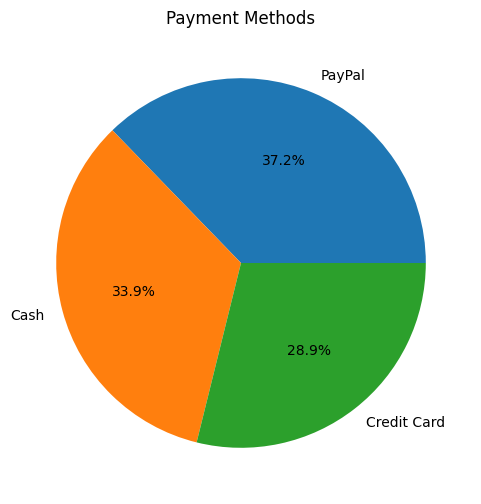

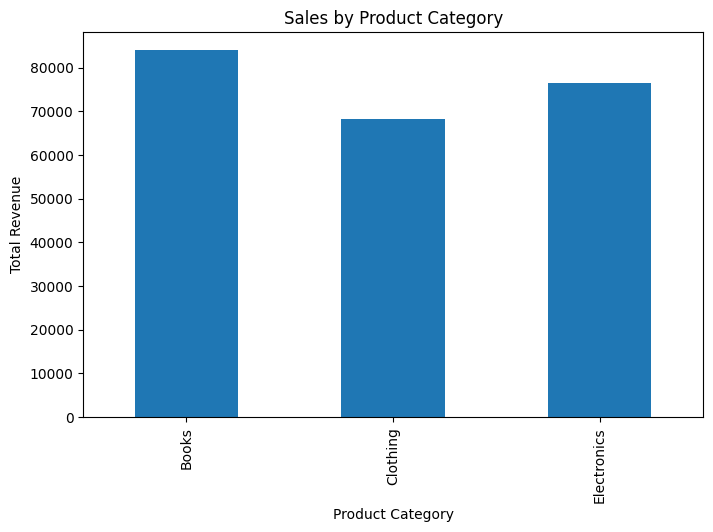

In [ ]:
#  Use sum() to calculate total revenue.
#  Use groupby(), sum(), and nlargest(3) to find the top 3 products.
# Use plt.pie() to visualize payment methods.
#  Use plot(kind='bar') to visualize sales by product category
import matplotlib.pyplot as plt

# Total Revenue
total_revenue = df['Total Revenue'].sum()
print(f"Total Revenue: {total_revenue}")

# Top 3 Best-Selling Products
top_3_products = df.groupby('Product Name')['Total Revenue'].sum().nlargest(3)
print("Top 3 Best-Selling Products:")
print(top_3_products)

# Pie Chart for Payment Methods
payment_method_counts = df['Payment Method'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%')
plt.title('Payment Methods')
plt.show()

# Bar Chart for Sales per Product Category
sales_by_category = df.groupby('Product Category')['Total Revenue'].sum()
plt.figure(figsize=(8, 5))
sales_by_category.plot(kind='bar')
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.show()

**6. Bonus Task (Automation - Optional)**

Highlight orders older than 30 days and still pending:

In [ ]:
# Calculate the difference between the current date and order date using pd.Timestamp.now(), and filter rows where the status is "Pending" and the difference is greater than 30 days.
from datetime import timedelta

# Convert 'Order Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the difference in days
df['Days Pending'] = (pd.Timestamp.now() - df['Date']).dt.days

# Highlight orders older than 30 days and still pending
old_pending_orders = df[(df['Delivery Status'] == 'Pending') & (df['Days Pending'] > 30)]
print(old_pending_orders)

          Date  Order ID  Customer Name Product Category Product Name  \
28  2025-01-22  ORD10028      Ian Black            Books    Biography   
30  2024-09-06  ORD10030    Fiona Green         Clothing     Sneakers   
36  2025-01-16  ORD10036      Bob Smith      Electronics   Headphones   
41  2025-01-11  ORD10041      Diana Lee         Clothing      T-Shirt   
51  2024-12-17  ORD10051      Diana Lee      Electronics       Laptop   
55  2024-10-06  ORD10055    Julia Adams      Electronics   Smartphone   
64  2024-09-06  ORD10064      Ian Black         Clothing        Jeans   
88  2024-12-27  ORD10088    Fiona Green      Electronics       Laptop   
106 2025-01-12  ORD10106    Fiona Green      Electronics   Smartphone   
109 2024-12-29  ORD10109    Julia Adams      Electronics   Headphones   
129 2024-10-26  ORD10129   George Brown      Electronics   Smartwatch   
140 2024-10-27  ORD10140      Diana Lee         Clothing     Sneakers   
147 2024-10-08  ORD10147    Fiona Green         Clo